In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load Dataset

In [8]:
train = pd.read_csv("./train.csv", index_col=["PassengerId"])

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Seaborn 

### countplot

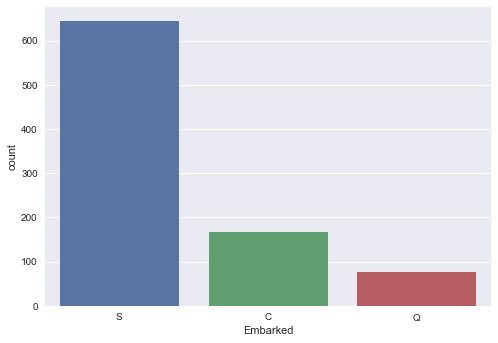

In [9]:
sns.countplot(data=train, x="Embarked")

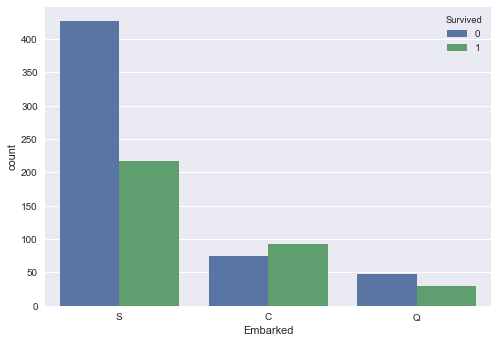

In [10]:
sns.countplot(data=train, x="Embarked", hue="Survived")

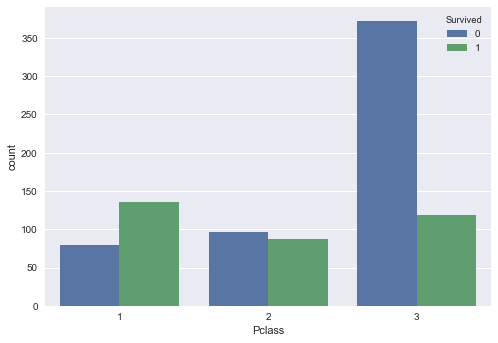

In [11]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### Barplot

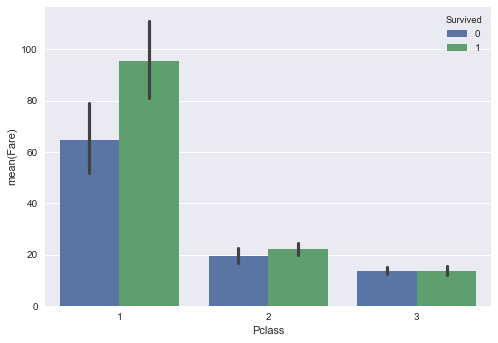

In [13]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### distplot

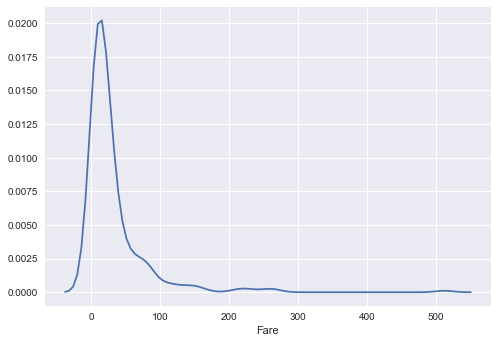

In [15]:
sns.distplot(train["Fare"], hist=False)

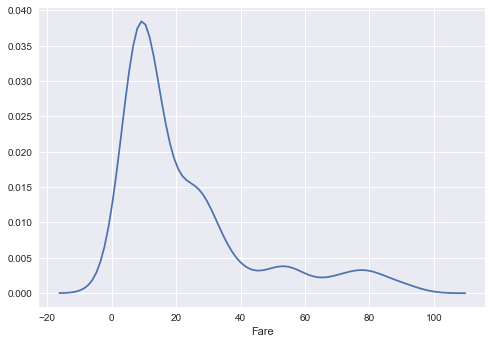

In [18]:
ignore_high_fare = train[train["Fare"] < 100]

sns.distplot(ignore_high_fare["Fare"], hist=False)

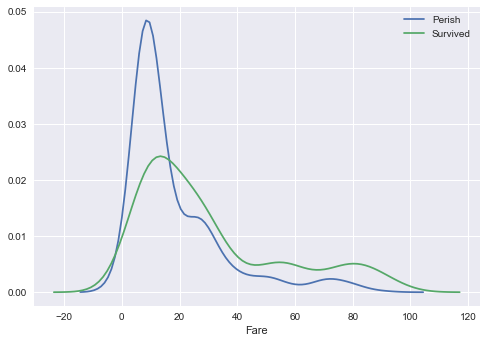

In [19]:
perish = ignore_high_fare[ignore_high_fare["Survived"] == 0]
survived = ignore_high_fare[ignore_high_fare["Survived"] == 1]

sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

### Implot

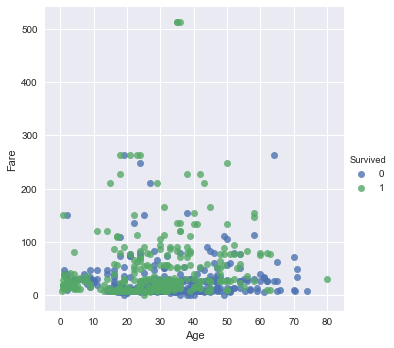

In [22]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

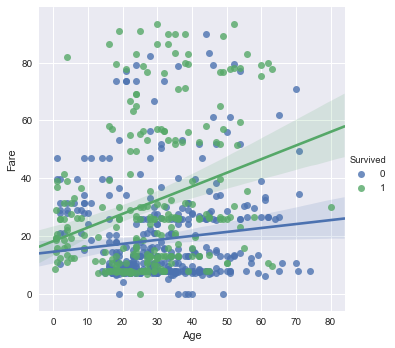

In [24]:
sns.lmplot(data=ignore_high_fare, x="Age", y="Fare", hue="Survived")

### subplots

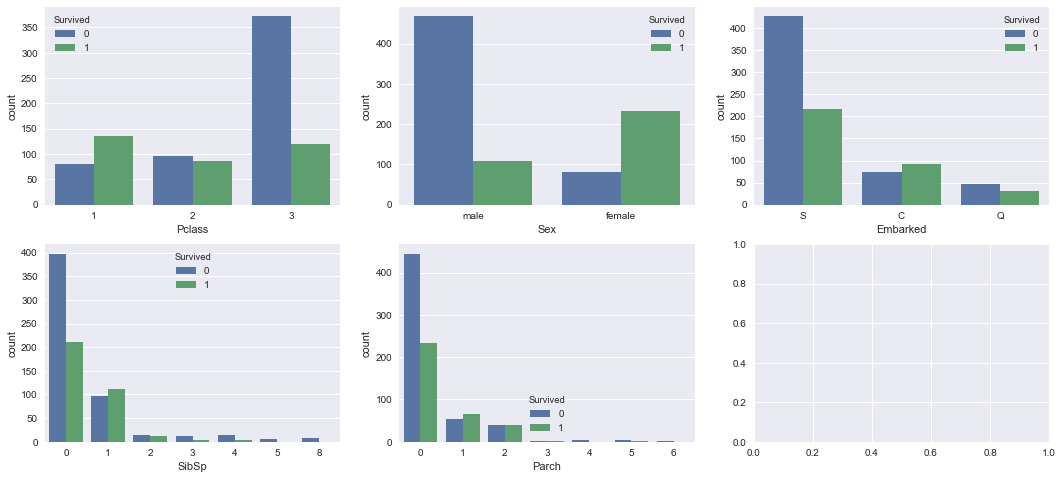

In [29]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)
# sns.countplot(data=train, x="", hue="Survived", ax=ax6)

In [36]:
def count_graph(data, col):
    figure, ax = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(18, 8)

    sns.countplot(data=data, x=col, ax=ax)

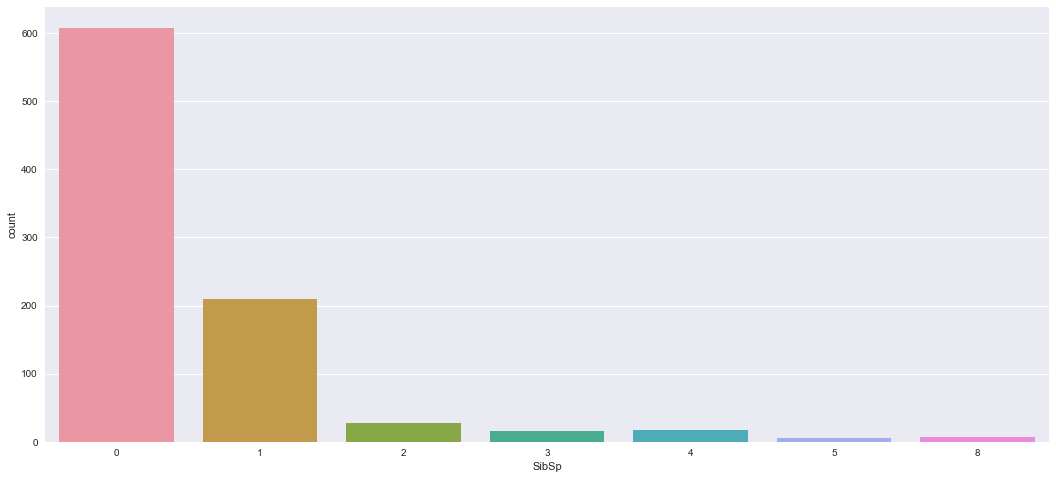

In [37]:
count_graph(train, "SibSp")

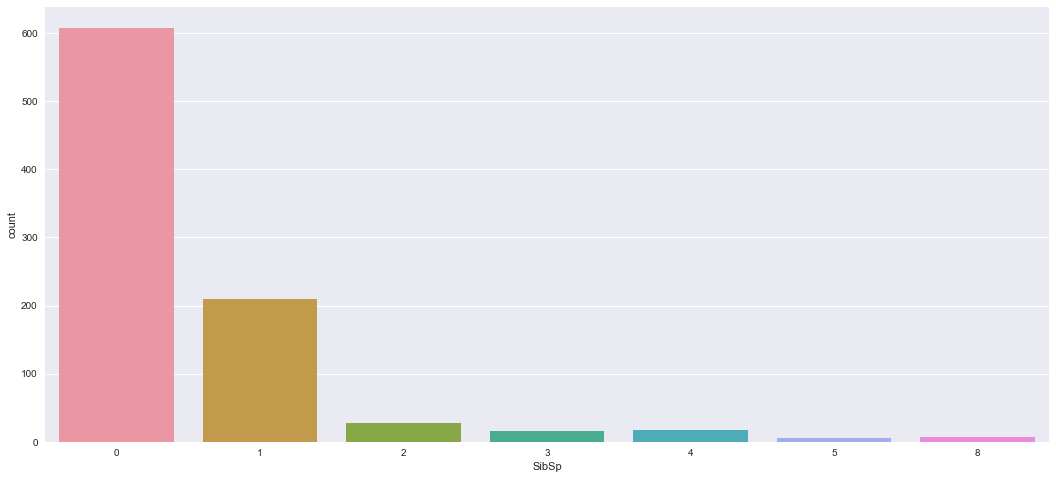

In [30]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)

sns.countplot(data=train, x="SibSp", ax=ax)

In [44]:
print(train['Name'][1])
print(train['Name'][2])

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)


In [49]:
s = 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
s.split(', ')[1].split('. ')[0]

'Mrs'

In [55]:
# find_title('Cumings, Mrs. John Bradley (Florence Briggs Thayer)')

In [51]:
def find_title(name):
    return name.split(', ')[1].split('. ')[0]

train['Title'] = train['Name'].apply(find_title)

print(train.shape)
train[['Name', 'Title']].head()

(891, 12)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


In [52]:
train['Title'] = train['Name'].apply(lambda name: name.split(', ')[1].split('. ')[0])

print(train.shape)
train[['Name', 'Title']].head()

(891, 12)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


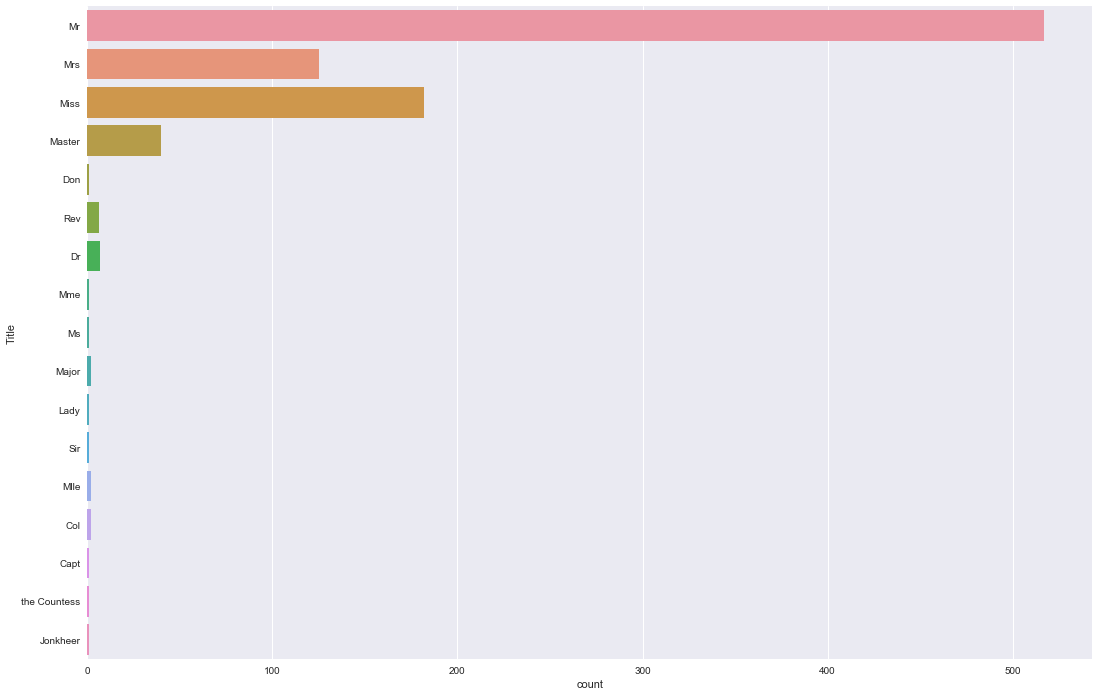

In [53]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 12)

sns.countplot(data=train, y="Title", ax=ax)